<img src="imgs/header.png" width="100%">

---------------

#### [ACM SIGCHI 2017 Course on Computational Interaction](http://chi17.computationalinteraction.org)

# Unit I: Optimization
### Designing Layouts with Combinatorial Optimization

#### <b>[Antti Oulasvirta](http://users.comnet.aalto.fi/oulasvir/)</b> / Aalto University

*Combinatorial optimization refers to algorithmic search for a combination of design decisions that best meets stated design objectives. Published applications include keyboards, menu systems, graphical user interfaces, information visualizations, and input methods. In this 40-minute unit, we learn three basic concepts: design space (feasible set), objective function, and search method. A plain vanilla black box optimizer implements these principles. Our exercises apply it in layout design tasks of increasing difficulty.*

#### Primary sources
1. Oulasvirta, A. (2017) [User Interface Design with Combinatorial Optimization](http://users.comnet.aalto.fi/oulasvir/pubs/UIdesign_with_combinatorial_optimization_IEEEComputer_2017_Oulasvirta.pdf), IEEE Computer 50 (1), pp. 40-47. 
2. Oulasvirta., A. & Karrenbauer, A. (forthcoming). Combinatorial Optimization for Interface Design, in "Computational Interaction Design", Oxford University Press.

## Learning objectives

---
Combinatorial optimization refers to searching for the best combination of design decisions for stated design objectives. It offers a rigorous yet actionable formalism for HCI. 

### Targeted audience

* HCI enthusiasts with some exposure to search algorithms
* Computer scientists with interest in but little experience with HCI problems
* Computer-savvy design professionals interested in computational design

No prior knowledge on combinatorial optimization methods nor behavioral modeling is assumed. 

### In this unit, you will learn how to ...

* define a **layout design task** as a combinatorial optimization problem
* encode **design goals and assumptions** in its objective function
* choose and tune a suitable **search algorithm** (solver).

We also go through some assumptions behind this approach, and review its position in HCI.
 
### Practically, you will ...

* implement a random search -based optimizer for layout problems of increasing difficulty: linear menus, toolbars, dialogues, and web layouts
* understand what interface design 'means' from a combinatorial perspective (and what makes it hard)
* explore the consequences of changing the objective function
* boost efficiency with an advanced optimization method (here: simulated annealing).

The presented exercises amount to **an extensible plug-and-play approach to explore layout design problems**. 

## Table of contents

Throughout, our emphasis is on *conceptual understanding*. Links will be offered to understand requirements for harder problems.

The rest of the Unit is organized as follows:
1. Motivation and background
2. Basic concepts
3. Linear menu design
4. Basic concepts: Revisited
5. Toolbar design
6. Dialogue design
7. Web layout design
8. Scaling up

# 1. Motivation and background
-----------------

### An executable formalism for interaction design 

*Optimization* refers to both the **outcome** (optimal design) and the **process** of systematically improving a design. Interface design, then, is algorithmic combination of discrete design decisions to obtain an optimal solution defined by an objective function. To *design interaction* is about improving design decisions algorithmically in the light of best information on what makes interaction good for users.

The properties of combinatorial optimization as an approach to HCI are unique: 

| Property | What  |
|----------|------|
|**Constructive** |  The algorithm constructs a full design.   |
|**Reductionist AND holist**  |  The goodness of a design choice is considered in the context of the whole design.    |
|**Predictive**  |  The objective function makes an explicit and empirically verifiable statement about the 'goodness' of each design.   |
|**Systematic**  |  Exploits a wealth of efficient algorithms known in computer science. These offer a higher chance for finding good designs.    |
|**Explicit**  |  All assumptions are scrutinable. The system is interpretable and controllable (in principle at least). Cf. black-box approaches in machine learning.   |

There are strong rationale for this method in HCI. It offers:
* a **rigorous theoretical basis for design**, defining central concepts such as ’design task', 'design space’, ’design objective’, 'design method', and ’optimal design’
* **efficient solutions**, exploiting results of decades of research in computer science, and allowing you to attack complex problems with good results and pursue real-time interactive performance
* a **flexible toolbox** for automating and adapting designs and for supporting designers. 

### A flexible toolbox for designers

Model-based combinatorial optimization is a [multidisciplinary approach to computational design](imgs/multidisciplinary-overview.png) inviting contributions from computer scientists, designers, and behavioral scientists. After successful definition of a method, it can be used as a [tool in user-centered design](imgs/ucd.png) and with [data-driven design](imgs/ucd-with-ML.png). 

**General benefits to practitioners** include:
* Improved quality of solutions: Modern optimization methods support designers by offering a high chance of finding good or optimal solutions 
* Solutions to hard (large, multi-objective) problems
* A successful approach can be used repeatedly to different instances of the task.
* Integratable with interactive design tools
* Information about the complexity and structure of a problem 
* Estimates of practically achievable improvements possible for a given design
* Explicit, scrutinable approach that can support knowledge building in a team.

Importantly, combinatorial optimization can be used not only to find an optimal design but to **assist a designer in various problems encountered in design**, such as:
* a unique (maximally different but equally good) solution
* a design that strikes the best compromise among competing objectives
* a design that is robust to changes in assumptions (e.g., about conditions of use or users)
* a design achieved by minimal changes to a current design
* a design that is within some k% from the present design. 

### Benefits if your background is in ...

* **HCI**: An executable formalism to analyze, design, and adapt interaction. 
* **Design**: problem-solving in steroids! Define design problems such that they can be delegated for computers to solve to optimality. (Philosophical note: Donald Schön criticized rationalist approaches to design for reductionism. However, combinatorial optimization is both reductionist and holist: the goodness of a design choice is only determined in the context of the design as a whole.)
* **Computer science**: Human-computer interaction offers a new exciting application area for familiar algorithmic and analytical methods. The challenge lies in encoding knowledge about humans in problem definitions.
* **Behavioral and cognitive sciences**: Herbert Simon wrote that the proper way to study man is the study of how to design artefacts for them. Optimization offers an important instrument to apply models and theories in practical problems.

### Warning! 
 
Combinatorial optimization is a principled approach that insists on rigorous definitions of the design task and objectives. Be warned about **the costs of rigor**:

1. Ramp-up costs: Formal definition and development of search methods can be laborious and risky;
2. At times exceedingly hard problems: While modest background in computer science suffices for first probes, real-world cases can be prohibitively hard and insist on professional support;
3. Knowledge gap: Defining meaningful objective functions (e.g., aesthetics, learnability) may require support from a cognitive or behavioral scientist with mathematical abilities.

### Gallery of recent results

Source: A. Oulasvirta (2017) IEEE Computer:
<img src="imgs/results-gallery.png" width=99%>

* Another example: [Scatterplot optimization using perceptual models](imgs/scatterplots.png)

### Historical and philosophical backdrop

* [History at a glance](imgs/history.png)
* [Philosophical backdrop: "The Sciences of the Artificial" by Herbert Simon](https://monoskop.org/images/9/9c/Simon_Herbert_A_The_Sciences_of_the_Artificial_3rd_ed.pdf)

# 2. Basic concepts

---------------

Combinatorial optimization insists on defining a **design task**, consisting of:
1. **search space** (design space implemented in code; aka feasible set, candidate set), which is a finite set of alternative designs; 
2. **objective function**, which defines what you mean by 'good' or 'desirable design';
3. **task instance**, which sets task-specific parameters.

A task defined like this can then be attacked by a **solver**, which goes through the design space to find increasingly better designs. We use this structure in the following exercises.

<img src="imgs/optimization.png" width="95%">

### Design task

In plain words, the task is to find the design that yields the highest value of a given objective (goodness) function. This function captures assumptions and knowledge about what makes a design 'good':
$$\max_{d \in D} f (d)$$
where
* $d$ is **a candidate design**, 
* $D$ is the set of all feasible designs, or **design space** (search space), and
* $f (\mathbf{x})$ is **the objective function**.

However, this definition is not actionable. Why? Because it does not expose the structure of the design space. The following definition makes **the combinatorial structure of design** more explicit:
$$\mbox{Find } \mathbf{x} =
	\begin{pmatrix}
	x_1 \\
	x_2 \\
	\vdots \\
	x_n
	\end{pmatrix} \in \mathbf{X}
\mbox{ which maximizes } f(\mathbf{x})$$
where 
* $\mathbf{x}$ is an *n*-dimensional **design vector**,  each dimension describing a **design variable**, and
* $\mathbf{X}$ is **the set of feasible designs** (all to-be-considered design vectors).

In plain words, a design is a vector in a multi-dimensional vector space. The objective function assigns each vector a value describing its goodness (or badness). When we optimize, we are looking for the vectors that obtain the highest value.

### Design space

A design space is the product of design variables under consideration. In a real design problem, some variables are fixed, but some are open. **A design variable** can capture such open decision using familiar types of variables, such as:
* boolean (e.g., Do we offer auditory feedback for button press or not?)
* integer (e.g., position of an element on x-axis)
* real (e.g., hue)
* categorical (e.g., type of an element).

In combinatorial optimization continuous variables are discretized. 

However, not all designs in a design space obtained this way are technically feasible. Consider a hierarchical menu, where a submenu might not be reachable from the top. Functional and other requirements that 'rule out' candidate designs are collectively called **design constraints**. Another example: When designing a Web layout, we should not place elements such that they overlap.

#### Analysis of problem size

The first benefit of this approach is visible now: Defining a design space like this allows examining its size. When we start doing this, we quickly realize that **design spaces in HCI are often exceedingly large**. For example, for $n$ functionality there are $2^n - 1$ ways to combine them to an application, which for only 50 functions means 1,125,899,906,842,623 possibilities. Further, assuming that 50 have been selected, they can be organized into a hierarhical menu in $100! \approx 10^{158}$ ways.  

### Objective function

The objective function $f( \mathbf{x} )$ states what makes a design good. Technically, it is a function that assigns an **objective score (or value)** to each design candidate. The design candidate that obtains the highest (or lowest, when minimizing) score is the **optimum design**.

In HCI, the objective can be anything regarded desirable, such as surface features of the interface (e.g., minimal white space) or expected performance of users (e.g., 'task A should be completed as quickly as possible') and so on. Our opinion is that the quality of a interface should be primarly determined by reference to end-users, for example their performance and experiences. 

#### Where to obtain a function?

While we will later see examples of objective functions, it is good to know that there are many principled (and unprincipled) ways to obtain them:
* Literature: A model or theory from prior work
* Data-driven approach: Use e.g. statistics or machine learning to obtain a model from data
* Standards, guidelines, and design patterns
* Heuristics, such as guidelines and best-found practices.

### Solver

After a task has been defined, a solver should be chosen and tuned to attack its instances. We will later look at solvers and their different properties. The process of 'solving' can be intuitively understood as search for highest peaks (when maximizing), or lowest valleys (when minimizing), in a vast 'landscape':

<img src="imgs/landscapes.png" width="80%">

### A word about the notion of optimality

Combinatorial optimization offers a rigorous yet actionable (executable) definition of optimality: To say that a design is optimal is to say that in the defined set of candidate designs, there is no better design (global optimum has been identified). 

The word 'optimal' is **overused and misused**. In order to claim that a design is optimal, one *must* answer the following questions:
1. The best out of which options? (design space)
2. The best for what? (design objectives and task instance)
3. The best with what guarantees? (search method)

Answer to the last question defines the 'flavor' of optimality. A design is **globally optimal** when the search method *guarantees* that it achieves the highest objective value in the whole design space. Such guarantees are offered by exhaustive search and exact methods (e.g., integer programming). 

When we do not have access to those methods, for example because the complexity of the objective function, we cannot claim global optimality. A design is **approximately optimal** when either its objective value is within a defined margin of the optimal design or there is a high chance that only marginally better designs exist. When we have multiple objectives, defining optimality is trickier (Homework: learn the notion of **pareto optimality**).

# 3. Our first optimizer: Linear menu design

----------

Our first optimizer looks at the design of a **linear menu**, one of the most prevalent type of user interfaces we find in mobile and desktop applications, web services, and consumer electronics. This optimizer serves as an educational example illustrating the concepts introduced above.

### Task definition

The design of a linear menu is a known problem, so-called **assignment problem**: *n* commands are to be *assigned* to *n* predetermined locations (slots) in order to maximize usability (here: minimize selection time). (Moreover, we insist that every slot must be filled with one command, and each command must be assigned only once.) With these assumptions, a linear menu with *n* items can be organized in *n!* ways. (Homework: How many designs for a tabbed or hierarchical menu?)

We implement a simple objective function emulating a novice user's search performance with a menu, and a random search algorithm as our solver. An overview of our design task:

| Aspect | Content  |
|----------|------|
| Design task | Given *n* menu items, decide their order to minimize expected selection time |
| Design space | All possible orderings of the items (*n!* in total)  |
| Objective function | Minimize expected selection time |
| Task instance | Specification of elements and their relative importance |
| Solver | Random search |

Note that we are simply ordering elements. To design a more complex menu  system, like the one on the right, we would in addition need to decidethe sizes of elements and their colors:

<img src="imgs/menus.png" width="90%">

#### Introduction to code

We implement a scaffolding for a plug-and-play black box optimizer:
* Our search space -- all orderings of *n* elements -- is represented as a list in Python. The position of an element indicates its position in the menu.
* Our solver shuffles this list to generate a new candidate (random search)
* Our objective function computes expected search time in $O(n^2)$ time
* Our *optimize* function takes *any* solver function and objective function as input. It then calls the solver using the objective function as its input. We use this 'oracle optimizer' later with different inputs.

In [14]:
import math, random
import render # For presenting layouts for rendering in Jupyter 
from IPython.display import SVG # SVG capabilities for showing layouts

# Returns Euclidean (unit) distance between two element positions in a grid layout
# Needed in our objective function (ST)
def distance (columns, i, j):
    return math.sqrt( abs(j / columns - i / columns)**2 + abs( i % columns - j % columns)**2) 
    
# Our objective function: Expected selection time. 
# - A weighted sum of individual selection times weighed by their importance/probability (weight)
# - This simplifies the novice model of menu search time presented by Cockburn et al. CHI 2007 
def linear_ST (layout, columns, o_inputs):
    ST = 0.0
    reading_cost = 0.4 # assumed that scanning a single item takes 400 ms
    for i,element in enumerate(layout):
        try: 
            # Reading cost is a function of the number of elements intervening between top of menu and target
            ST += o_inputs[0][layout[i]] * distance(columns,0,i) * reading_cost
        except:
            pass
    return ST

# Our solver: Random search method
# - Shuffles a layout (list) and asks from objective function how good it is
# - Updates incumbent (best known design) whenever an improvement is found
# - Continues like this max_iters times
def random_search(max_iters, *args):
    columns = args[1]
    obj_f = args[2]
    o_inputs = args[3:]
    incumbent = args[0]
    incumbent_ov = obj_f(incumbent, columns, o_inputs) # Set initial objective value
    
    for iter in range (0, max_iters):
        candidate = random.sample(incumbent, len(incumbent)) # Shuffle the design (note: this methos is slow)
        candidate_ov = obj_f(candidate, columns, o_inputs) # Then compute its objective value

        if candidate_ov < incumbent_ov: # Update best known if an improvement was found
            incumbent = candidate[:]
            incumbent_ov = candidate_ov
    return incumbent, incumbent_ov

# Our generic optimization service:
# - Solver and objective function are given as arguments
# - Used throughout the exercises
def optimize (iters, solver, *args):
    return solver(iters, *args)

Objective value (expected selection time): 1.96


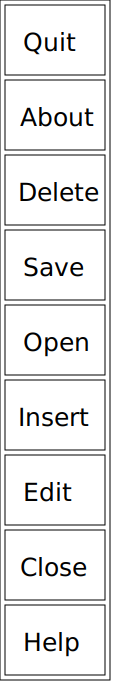

In [15]:
# We also need to define the particular task we want to solve, 
# including definition of elements and their 'importance'

# Task instance
seed_layout =    ['Open', 'About','Quit','Help','Close','Save','Edit','Insert','Delete'] # initial layout
e_weights = {'Quit':0.5,'About':0.4,'Open':0.2,'Save':0.2,'Close':0.1,'Help':0.05,'Edit':0.1,'Insert':0.2,'Delete':0.2} # weights or 'importance' of elements

# Call the optimizer 
winner, winner_score = optimize(10000, random_search, seed_layout, 1, linear_ST, e_weights)

# Show result
print "Objective value (expected selection time):", winner_score
SVGlayout = render.SVGlayout(winner,1)
SVG(SVGlayout.inSVG)


### Reflection

Optimizing an interface is **easy**! Only a few lines were needed to capture some basic concepts. The bad news is this: this was **an overkill and a toy case**. Why? Our objective function was essentially about minimizing the distance of important elements to top. This problem could have been solved simply by ordering the items in decreasing order of importance. The problem would be harder if we did not ignore some other important design considerations, such as grouping of elements. Also, our solver was incredibly wasteful. This did not become an obstacle only because the size of the problem was small. 

Before moving on, let us [recap the basic concepts in the light of this example.](imgs/summary.png)

# 4. Basic concepts: Revisited

------------------

To attack more interesting problems, we need to revisit the basic concepts. 

<img src="imgs/overview.png" width="80%">

### Search space

*Search space* is a representation of the feasible set for a search algorithm. [Some representations are illustrated here](imgs/representations.png). The choice of representation affects:
* formulation of the concept of *search neighborhood*, a key concern for many search methods (see examples below)
* computational efficiency
* ease of extension 

In the following, we use a *list* representation for conceptual clarity.

### Objective function

As said, **an objective function** maps a design candidate $x \in \mathbf{X}$ to a real-valued predictor:
$f: \mathbf{X} \rightarrow \mathbb{R}$.
To be relevant for interaction design, this function should quantify an aspect like usability, enjoyability, ergonomics, or errors. Several objectives may need to be combined for reasonable results ([example in web layout design; Todi et al. DIS 2016](imgs/multi-objective.png).

Several models and heuristics are available to this end. This table shows 11 examples spanning task, cognitive, motor, and aesthetic aspects:

| Model | Example objective |  Optimization ref.  |
|----------|------|-------|
| Fitts' law  |  Minimize finger travel times | Zhai et al. UIST 2000 |
| Search-Decide-Point | Minimize visual search time assuming learning | Bailly et al. UIST 2013 |
| Coherence  |  Ensure related items are close to each other | Bailly et al. UIST 2013 |
| Familiarity |  Ensure spatial resemblance with a prior design | Dunlop et al. CHI 2013 |
| Keystroke-level model | Minimize task completion time for a sequential user task | Sarcar et al. IxAP 2016 |
| Active vision | Minimize visual search time when items are colored | Todi et al. DIS 2016 |
| Rosenholtz clutter model | Minimize visual clutter, maximize saliency | Todi et al. DIS 2016 |
| Color harmony theory | Ensure harmonious color sets | Todi et al. DIS 2016 |
| Motor complexity theory | Minimize complexity of a gesture | Sridhar et al. CHI 2015 |
| Ergonomics | Minimize shoulder stress | Bachynskyi et al. TOCHI 2015 |
| Internal clock model | Ensure some level of accuracy in a temporal tasks | Lee et al. CHI 2016 |

Subjective goals can be dealt with by two main means: (1) by calibrating weights to correspond to some distribution of preferences, be they designers' or users'; (2) by parametrizing predictive models to correspond to users' individual priorities. For example, user groups might have different distributions of tasks (KLM) or expertise (SDP).

It is important to note that the choice of modeling formalism affects two critical goals:
1. **Predictive validity**: Prediction of desired outcomes in interaction 
2. **Computational efficiency**:  Minimum time to evaluate a design for a chosen solver.

#### Choice of formalism

**Heuristics** are rules of thumb used in design,  such as 'white space should be minimized'.  Since most heuristics are 'weak' (carry little information), multiple are needed. This leads to the problem of **conflict resolution**: how to weigh the contribution of one heuristic against another. Another issue of heuristics is their questionable validity.

**Metrics** are expressed as a real-valued functions that capture some feature of a design linked to empirical outcomes. Example: Overplotting metrics in the design of information visualizations.

**Regression** offers a more expressive yet quickly computable mathematical form of cost functions:
$y = f (\mathbf{x}, \mathbf{\beta} ) + \epsilon$ . 

**Simulator-based models** are step-wise executed functions $M$ that map the model parameters $\theta$ to data. In HCI, the parameters $\theta$ capture both parameters of the user and those of the task or context. Simulators are **generative models** that predict not only the outcomes of interaction but intermediate steps, or the process of interaction. A simulator may address multiple design objectives in a coherent manner that require less weight-tuning. However, they are non-linear and significantly more expensive to execute, ruling out exact methods (e.g, integer programming).

### Task instance

*Task instance* refers to task-specific input values to the design task and objective function, such as:
* How many or which elements to place and their properties (sizes, colors etc) 
* Relative importance of given design objectives (e.g,. is usability more critical than security?)
* Inputs expressing properties of targeted user groups, such as goals, capabilities, and interaction styles of users (e.g., what do they want to achieve with the interface?)
* Constraints of the interface (e.g., screen resolution, input method).

The task instance is specified by designer or inferred from data.

### Optimization method

Modern methods in combinatorial optimization can be divided into two main classes: 
1. **Black-box or heuristic methods** do not make any explicit assumptions on the objective function they are going to optimize, but rather they consider it as a black-box -- like an oracle -- that tells them the objective value of a given candidate. There are deterministic and randomized black-box methods. 
2. **Exact methods** such as integer programming offer mathematical guarantees for solutions but insist on analysis of the objective function for revealing simplifications and links to known tasks in the optimization literature. We do not discuss exact methods in this unit.

Excellent summaries of available methods are given in available textbooks. We here expose some main categories.

#### Heuristic methods

If the evaluation of the objective function for a given configuration is inexpensive, then randomized heuristics are often an effective way to obtain solutions of good quality. However, this approach requires some **parameter engineering** to find an apropriate (hyper) parameters (e.g., cooling schedule in simulated annealing). 

**Greedy algorithms** divide the construction of a solution into multiple subsequent decisions. These decisions are taken in a certain order and are not revoked later. 

**Local search** relies on a definition of a **neighborhood** of a given design. For example, the neighboring layouts of a keyboard layouts are those that can be constructed by swapping a pair of letters. Starting from an initial configuration, local search proceeds by chosing a neighboring configuration with an objective value that is at least as good as the current one. These choices could be, for example, greedy or randomized.

**Simulated Annealing** attempts to solve the issue with local search. A neighboring configuration is not only chosen when it yields to a better objective value but also with a certain probability when it is worse. This probability decreases with the extent of the detoriation of the objective value (temperature). 

**Meta-heuristics**: Simulated annealing belongs to the class of meta-heuristics: they include hyper parameters to control how to diversify/intensify search and to learn from past solutions. Further members of this class include popular biology-inspired meta-heuristics such as *genetic algorithms* and *ant colony optimization*.

#### Exact methods 

It is good to know that if there is an analytical description of the objective function, then integer programming can be used. It is useful because of guarantees that can be given to quality, but also because of the availability of powerful solvers (e.g., CPLEX and Gurobi).

Exact methods (e.g, Branch & Bound) are guaranteed to find the optimum solution in finite time. However, this time may be exponential because of NP-completeness of the involved problems. The simplest exact method is **explicit enumeration**, where the objective value of each element of the solution space is evaluated, and the current best solution -- the so-called **incumbent** -- is updated. In **implicit enumeration** relaxations are used to make the problem tractable. If the best objective value of the relaxation restricted to a subset of solutions is worse than the objective value of the incumbent, we can savely discard all solutions from this subset at once, because none of them can replace the incumbent. Moreover, relaxations deliver **guarantees** for the quality of the incumbent, e.g., if the optimum objective value of the incumbent is only 1% away from the optimum objective value of the relaxation, we know that it can also be at most 1% away from the optimum of the original problem. A very popular form of implicit enumeration is Branch and Bound, a standard method for solving Integer (Linear) Programs.

# 5. Toolbar design

---------------

We can turn to the design of more complicated interactive layouts. **Toolbars**, widely used in desktop and web applications, are essentially **grid menus** (typically with an elongated shape). To design a toolbar, ordering is not enough. One needs to consider how to ensure that related items are close to each other.

| New aspect | Content  |
|----------|------|
| Design objectives | Minimum selection time; **Minimum incoherence** |
| Task instance | 12 elements in a productivity app |


<img src="imgs/toolbar.png" width="70%">

Remark: That combinatorial optimization lies on abstraction and decomposition of problems becomes visible neatly in this exercise. The design of an interactive layout like this is, intuitively, about [**placing rectangles on a rectangles**](imgs/gui-design.png).

#### Code
Our code adds a new objective function for incoherence.

Objective value: 3.23601459504


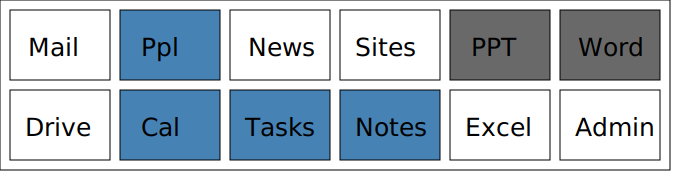

In [8]:
# A new objective function that considers two objectives: selection time and incoherence
def ST_and_I (layout, columns, o_inputs):
    return linear_ST (layout,columns,o_inputs[0:]) + 0.5 * incoherence (layout,columns,o_inputs[1:])
    
# Incoherence score I
# - Computed based on distance between element pairs weighed according to association
def incoherence (layout, columns, o_inputs):
    I = 0.0
    for i in range(0, len(layout)):
        for j in range(i+1, len(layout)):
            association = max(0,o_inputs[0].get(layout[i]+layout[j]), o_inputs[0].get(layout[j] + layout[i]))
            I += distance(columns, i,j) * association
    return I

# Task instance
seed_layout = ['Tasks','Word','Excel','PPT','Admin','Mail','Cal','Ppl','News','Drive','Sites','Notes']
e_weights = {'Tasks':0.1,'Word':0.2,'Excel':0.15,'PPT':0.2,'Admin':0.05,'Mail':0.5,'Cal':0.4,'Ppl':0.4,'News':0.4,'Drive':0.2,'Sites':0.01, 'Notes':0.05}
associations = {'WordExcel':0.5,'WordPPT':0.5,'MailCal':0.3,'PplCal':0.3,'TasksCal':0.2,'NotesTasks': 0.3}
columns = 6

# Optimization
winner, winner_score = optimize(10000, random_search, seed_layout, columns, ST_and_I, e_weights, associations)

# Results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

## Simulated annealing

Results obtained thus far have been reasonable, because the problems have been small. To attack larger problems efficiently, we turn to **simulated annealing**:
* [Simulated annealing](imgs/sa.jpg)
* [The annealing process: Animation](imgs/simulated-annealing.gif)
* [Pseudo-code](imgs/sa-pseudocode.png) 

we run the same exercise using simulated annealing, observing that (on average) better objective value is obtained with the same computation budget.

| New aspect | Content  |
|----------|------|
| Solver | **Simulated annealing** |

#### Code
We need to add a function that allows the simulated annealer to explore the *neighborhood* of a current design. While there are many possibilities to construct a neighborhood, we use swapping here, as it is intuitive in the context of lattice layouts.

Objective value: 3.06807181685


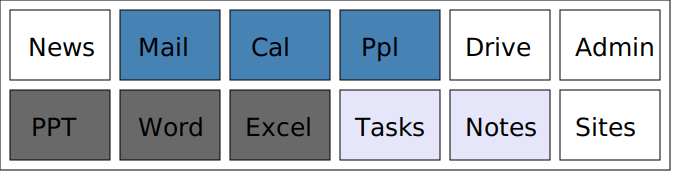

In [10]:
# Swaps two random elements of a layout n times 
def swap(layout, n=1):
    for m in range (0, n):
        i = random.randrange(0,len(layout))
        j = random.randrange(0,len(layout))
        if i == j:
            return layout 
        layout[i], layout[j] = layout[j], layout[i]
    return layout

# Solver: Simulated annealing using exponential cooling schedule
def anneal(k_max, *args):
    s = args[0]
    columns = args[1]
    obj_f = args[2]
    o_inputs = args[3:]
    s_ov = obj_f(s, columns, o_inputs)
    T_min, T_initial, alpha = 0.0000001, 10000, 0.991 # Hyper parameters 
    converged = False
    
    for k in range (0, k_max):
        T = max(T_min, T_initial * math.pow(alpha,k)) # exponential cooling schedule
        s_new = swap(s[:], args[-1])
        s_new_ov = obj_f(s_new, columns, o_inputs)

        delta = s_new_ov - s_ov
        if delta < 0: # accept the neighbor if it is better 
            s = s_new[:]
            s_ov = s_new_ov
        elif random.random() < math.exp(-delta/T): # if not, decide according to the Metropolis rule
            s = s_new[:]
            s_ov = s_new_ov
    return s, s_ov

# Optimization
winner, winner_score = optimize(10000, anneal, seed_layout, columns, ST_and_I, e_weights, associations, 1)

# Present results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,10,associations)
SVG(SVGlayout.inSVG)

# 6. Dialogue design

**Dialogues and forms** are similar to grid menus, with more constraints added to the relative placing of elements. We can model that in the task instance without changes to our objective function. Here, *n* elements must be placed on *n* slots, such that related items (e.g., label 'Password' should be next to its text entry field) are close to each other. Relative order of elements can be defined (e.g., 'OK' must occur only after manipulating some other field).

| New aspect | Content  |
|----------|------|
| Task instance | Labels and entry fields, OK and Cancel button; Associations among element-pairs |

We here consider a simple type with only 8 elements. Our case imitates that of a regular **login dialogue** such as this:
<img src="imgs/login-dialogue.png" width=50%>


Objective value: 2.61915666582


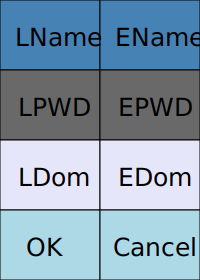

In [11]:
seed_layout = ['LName','EName','LPWD','EPWD','LDom','EDom','OK','Cancel']
e_weights = {'LName':0.6,'EName':0.5,'LPWD':0.3,'EPWD':0.2,'LDom':0.1,'EDom':0.05,'OK':0.03,'Cancel':0.02}
associations = {'LNameEName':1.0,'LPWDEPWD':1.0,'LDomEDom':1.0,'OKCancel':1.0}
columns = 2

# Optimization
winner, winner_score = optimize(10000, anneal, seed_layout, columns, ST_and_I, e_weights, associations, 2)

# Present results
print "Objective value:", winner_score
SVGlayout = render.SVGlayout(winner,columns,0,associations)
SVG(SVGlayout.inSVG)

### Reflection

This problem is heavily constrained by the input data. With this in mind, it would be possible to build a solver that places elements in order of importance and in groups defined by pairwise associations. 

# 7. Web layouts

The design of a **web layouts** (or, any graphical widget layout) is an order of magnitude harder problem. First, we start combining requirements we saw for menu (= some elements more important to be found quickly than others) and for dialogues (= some elements must be manipulated in some order). More importantly, the canvas will larger, providing way more options on how to place items. There may also be empty slots (white space). 

Finally, we also must consider additional objective functions. For example, it is well known that, or reasons of visual appeal, the alignment of element groups is important. To that end, we implement a simplified version of a **grid alignment function**:
* [Miniukovich, A. (2015). Computational Inteface Aesthetics. Proc. CHI'15](https://www.researchgate.net/profile/Aliaksei_Miniukovich/publication/300726008_Computation_of_Interface_Aesthetics/links/57d7e0b108ae5f03b49812c7.pdf)

Our revised design task is:

| New aspect | Content  |
|----------|------|
| Objective function | Selection time, Incoherence, **Misalignment** |
| Task instance | 36 elements; groups and associations |

As our task instance, we consider a design like the [CHI2017 homepage](imgs/chi-homepage.png).

16.854260137


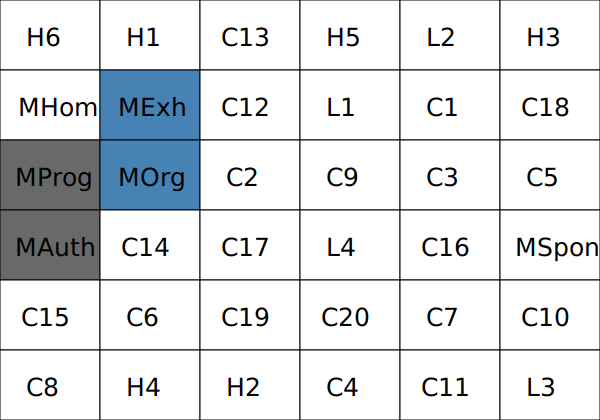

In [12]:
# A tri-objective function: selection time (ST) and incoherence (I) and misalignment (M)
def ST_and_I_and_M (layout, columns, o_inputs):
    ST = linear_ST(layout,columns,o_inputs[0:])
    I = incoherence (layout,columns,o_inputs[1:])
    M = misalignment(layout,columns,o_inputs[1:])
    return ST + 0.5 * I + 0.5 * M

# Returns a misalignment score M
# - Inspired by grid quality metrics (Miniukovich et al. CHI'15)
# - An important difference is that the number of grid lines is not minimized
def misalignment (layout, columns, o_inputs):
    M = len(o_inputs[0].keys())+1 
    for i in range(0, len(layout)):
        verticals = 0.0
        horizontals = 0.0
        related = 0.0
        for j in range(0, len(layout)):
            if i==j: 
                next
            association = max(0,o_inputs[0].get(layout[i]+layout[j]), o_inputs[0].get(layout[j] + layout[i]))
            if association == 0:
                next 
            else:
                related += 1
                verticals += vertically_aligned(columns, i,j)
                horizontals += horizontally_aligned(columns, i,j)
                #print i,j,verticals,horizontals
        if related > 0:
            M -= 1.0 * (max(verticals/related, horizontals/related) - min(verticals/related, horizontals/related))
    return M

# Helper functions for the new misalignment value
# Returns 1 if two elements are vertically aligned
def vertically_aligned (columns, i, j):
    #print "vert", i,j, abs(j-i), abs(j-i) % columns
    if (abs(j-i) % columns) == 0:
        return 1.0
    else:
        return 0.0

# returns 1 if two elements are horizontally aligned
def horizontally_aligned (columns, i, j):
    #print "hor", i,j, abs(j-i), int(j/columns), int(i/columns)
    if (abs(j-i) <= columns) and (int(j/columns) == int(i/columns)):
        return 1.0
    else:
        return 0.0

# Task instance
# We compose the task in several pieces to make its structure clearer
menu = ['MExh','MOrg','MHom','MAuth','MProg','MSpon']
menu_weights = {'MHom':0.5}
menu_associations = {'MHomMAuth':0.5,'MAuthMProg':0.5,'MProgMSpon':0.5,'MSponMExh':0.5,'MExhMOrg':0.5}

header = ['H3','H4','H5','H6','H1','H2']
header_associations = {'H1H2':0.5,'H2H3':0.5,'H3H4':0.5,'H4H5':0.5,'H5H6':0.5}
header_weights = {'H1':0.3}

links = ['L1','L2','L3','L4']
links_associations = {'L1L2':0.5, 'L2L3':0.5, 'L3L4': 0.5}
links_weights = {'L1': 0.1}

content = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20']

# We here put these parts together to a single task instance
seed_layout = menu + header + links + content
random.shuffle(seed_layout)
weights = menu_weights.copy() 
weights.update(header_weights)
weights.update(links_weights)
associations = menu_associations.copy()
associations.update(header_associations)
associations.update(links_associations)
columns = 6

# Optimization
winner, winner_score = optimize(100000, anneal, seed_layout, columns, ST_and_I_and_M, weights, associations,1)

# Present results
print winner_score
SVGlayout = render.SVGlayout(winner,columns,0,associations)
SVG(SVGlayout.inSVG)

## Reflection

As you see, running 100K iterations, although it takes very long, does not still arrive at a good solution. Reasonable solutions require hours of computation. [Example result after 100K iterations using simulated annealing](imgs/result-100000.png)

What could be done? Much! The following techniques can be tried:
* A constructive meta-heuristic could be used. It uses 'memory' of previous solutions, allowing it to *combine* ideas from good designs. For example, ant colony optimization works like this.
* Optimizing the code (e.g., parallelization, precomputed lookup tables for objective function, ...), might allow x10 or even x100 speed-ups.
* Treating groups of associated elements as units (a heuristic made possible by our domain knowledge)
* Avoiding generating solutions that are likely/known to be bad.

# 8. Scaling up

---------------------

Combinatorial optimization offers a powerful tool for interface design. However, applications in realistic problems depend on success in: 1) formal definition of a design task, 2) encoding of meaningful design objectives and knowledge in the objective function, 3) choosing and tuning an efficient solver. After this, the algorithm can be used to support the creative and problem-solving activities of a designer. Different task instances can be solved with the approach once set up.

### Building optimization systems for real-world problems

This unit has shown the basic concepts of model-based combinatorial optimization in a plain vanilla black-box optimizer able to deal with simple layout problems. To scale up to real, publishable results, at least the following challenges stand out:
* **Acquiring meaningful input** data empirically or by using machine learning models
* **Calibrating parameters** of objective functions (e.g., empirically)
* **Justifying** the objective functions and design tasks against some empirical data or literature
* Constructing an **efficient solver**
* Developing a **tool** for designers to work with the optimization system
* Carrying out **diagnostics and visualizations** to understand the results
* Choosing and tuning a suitable **multi-objective function**
* Carrying out critical **empirical evaluation** of optimized interfaces.

### Advanced topics

As advanced topics, we recommend the following:
* **Robust optimization**: Designing with noise or uncertainty or change in task instances.  
* **Sensitivity analysis**: Analysis of how sensitive your optimized design is to alternative assumptions.
* **Dynamic optimization**: Designing interfaces for conditions that change during use.
* **Multi-objective optimization**: We have used the weighted sum approach, which has known limitations, such as fragility to calibration factors.
* **Interactive optimization**: Building optimization systems for designers to work with  [interactively](imgs/interactive-optimization.png)
* **Exact methods**: Exact methods like integer programming insist on a strict mathematical definition of a design task, but in return, offer guarantees for solution quality and efficient off-the-shelf solvers. 

### Scope and limitations

Although combinatorial optimization has been an active research field for decades, it has not been clear how to apply to user interface design. Because it was not clear how to mathematically express design tasks and design knowledge, applications were limited. Two core challenges are: 
1. mathematical definition of design problems as search problems [See criticism by Stuart Reeves](http://notesonresearch.tumblr.com/post/144097415613/is-interface-design-just-a-search-problem)
2. expression of evaluative knowledge, including design heuristics and predictive models of interaction

## Selected further readings

* Karrenbauer, A., Oulasvirta, A. (2014). [Keyboard optimization with integer programming](http://resources.mpi-inf.mpg.de/keyboardoptimization/). Proc. UIST'14. 
* Oulasvirta, A. (2017). [User Interface Design with Combinatorial Optimization](http://users.comnet.aalto.fi/oulasvir/pubs/UIdesign_with_combinatorial_optimization_IEEEComputer_2017_Oulasvirta.pdf), IEEE Computer 50 (1).
* Bailly, G. et al. (2013). [MenuOptimizer:  Interactive Optimization of Menu Systems](https://www.gillesbailly.fr/publis/BAILLY_MenuOptimizer.pdf), Proc. UIST 2013. 
* Todi, K. et al. [Sketchplorer: Sketch and explore with an optimizer](http://www.kashyaptodi.com/sketchplore/), Proc. DIS'16. 
* Micallef, L. et al. (2017). [Towards perceptual optimization of the visual design of scatterplots](http://ieeexplore.ieee.org/document/7864468/), IEEE TGCV
* Feit, A., Oulasvirta, A. (2105). [Exercises in assignment problems in keyboard design](https://www.slideshare.net/oulasvir/modelbased-user-interface-optimization-part-ii-letter-assignment-at-sicsa-summer-school-on-computational-interaction-2015?qid=4320d34c-8c76-42c8-9cd3-69b2260dbc3a&v=&b=&from_search=2), Lecture notes from 1st Computational Interaction Summer School 2015, Glasgow